# Approach Evaluation

In this notebook, we evaluate the performance of our approach.

In [1]:
import rich.pretty

rich.pretty.install()

In [2]:
import IPython.display

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np
import sklearn.metrics
from sklearn.metrics import RocCurveDisplay
import sqlalchemy as sa
from sklearn.metrics import roc_curve
import msgspec
import itertools
import pathlib as pl
import networkx as nx
import tqdm

In [4]:
from evaluatie import models as m
from evaluatie import utils
from evaluatie.data import FunctionDataset, DatasetOptions

In [5]:
mpl.rc(
    "font",
    size=12,
)

In [6]:
def create_table(dataset: FunctionDataset, score_col: str) -> pd.DataFrame:
    categories = ["low", "medium", "high", "all"]

    tbl = pd.DataFrame(
        index=pd.Index(
            categories,
            name="neighborhood_size",
        ),
        columns=pd.Index(
            categories,
            name="size",
        ),
    )

    for size, neighborhood_size in itertools.product(categories, categories):
        options = DatasetOptions(
            size=size,
            neighborhood_size=neighborhood_size,
        )
        subset_df = dataset.frame[options.indexer(dataset.frame)]

        fpr, tpr, threshholds = roc_curve(
            y_score=subset_df[score_col],
            y_true=subset_df["label"],
        )

        tbl.loc[neighborhood_size, size] = sklearn.metrics.auc(fpr, tpr)

    return tbl

In [7]:
def dataset_subsample(d: FunctionDataset) -> FunctionDataset:
    return FunctionDataset(
        name=d.name,
        frame=d.frame.groupby(
            by=[
                "qsize",
                "qneighborhood_size",
            ]
        ).sample(
            n=1_000,
            random_state=0,
        ),
    )

## BSim

In [ ]:
d = FunctionDataset.from_name("f:o0Xo2")
create_table(d, score_col="bsim")

In [ ]:
d = FunctionDataset.from_name("f:o0Xo3")
create_table(d, score_col="bsim")

In [ ]:
d = FunctionDataset.from_name("f:osXo0")
create_table(d, score_col="bsim")

In [ ]:
d = FunctionDataset.from_name("f:osXo2")
create_table(d, score_col="bsim")

In [ ]:
d = FunctionDataset.from_name("f:noinlineXinline")
create_table(d, score_col="bsim")

In [ ]:
d = FunctionDataset.from_name("f:x86Xarm")
create_table(d, score_col="bsim")

In [ ]:
d = FunctionDataset.from_name("f:armXmips")
create_table(d, score_col="bsim")

In [ ]:
d = FunctionDataset.from_name("f:x86Xmips")
create_table(d, score_col="bsim")

In [ ]:
d = FunctionDataset.from_name("f:malware-analysis")
create_table(d, score_col="bsim")

In [ ]:
d = FunctionDataset.from_name("f:firmware-analysis")
create_table(d, score_col="bsim")

In [ ]:
d = FunctionDataset.from_name("f:random")
create_table(d, score_col="bsim")

## NeighBSim Evaluation

In [8]:
name2dataset: dict[str, FunctionDataset] = {}

In [9]:
names = [
    # Usecases
    # "f:firmware-analysis",
    # "f:malware-analysis",
    # "f:random",
    # Optimisation
    # "f:o0Xo2",
    # "f:o0Xo3",
    "f:osXo0",
    "f:osXo2",
    "f:osXo3",
    # Architecture
    # "f:armXmips",
    # "f:x86Xarm",
    # "f:x86Xmips",
    # Inlining
    # "f:noinlineXinline",
]

In [10]:
for name in names:
    d = FunctionDataset.from_name(name)
    d = d.load_pickle()
    d = d.dropna()

    name2dataset[name] = d

In [11]:
for name, d in name2dataset.items():
    neighbsim_table = create_table(d, score_col="neighbsim")
    IPython.display.display(f"{name} -- NeighBSim")
    IPython.display.display(neighbsim_table)

    bsim_table = create_table(d, score_col="bsim")
    IPython.display.display(f"{name} -- BSim")
    IPython.display.display(bsim_table)

'f:osXo0 -- NeighBSim'

size,low,medium,high,all
neighborhood_size,,,,
low,0.887699,0.827094,0.787067,0.841722
medium,0.991338,0.995458,0.988409,0.991939
high,0.99275,0.99752,0.993819,0.994618
all,0.952476,0.944784,0.936519,0.944993


'f:osXo0 -- BSim'

size,low,medium,high,all
neighborhood_size,,,,
low,0.892946,0.837485,0.80352,0.853056
medium,0.970475,0.984016,0.982683,0.978822
high,0.969267,0.990416,0.99041,0.9827
all,0.942983,0.942889,0.938672,0.941498


'f:osXo2 -- NeighBSim'

size,low,medium,high,all
neighborhood_size,,,,
low,0.865297,0.853656,0.796358,0.841856
medium,0.988227,0.993658,0.993264,0.991246
high,0.994083,0.997363,0.997216,0.996209
all,0.943231,0.951383,0.93667,0.943575


'f:osXo2 -- BSim'

size,low,medium,high,all
neighborhood_size,,,,
low,0.877424,0.860679,0.814956,0.853211
medium,0.974675,0.987163,0.990502,0.982047
high,0.976283,0.99077,0.995921,0.986706
all,0.941257,0.950206,0.94105,0.942685


'f:osXo3 -- NeighBSim'

size,low,medium,high,all
neighborhood_size,,,,
low,0.844969,0.845985,0.782161,0.825797
medium,0.962472,0.983202,0.986983,0.976621
high,0.987175,0.993567,0.993922,0.991633
all,0.923595,0.946038,0.927432,0.931426


'f:osXo3 -- BSim'

size,low,medium,high,all
neighborhood_size,,,,
low,0.853926,0.853514,0.803776,0.836995
medium,0.939018,0.972637,0.988239,0.962825
high,0.945782,0.980617,0.994963,0.972648
all,0.910771,0.940859,0.935871,0.92598


In [49]:
bins = ["low", "medium", "high"]

x = np.arange(len(bins) * len(name2dataset), step=len(name2dataset))
inter_dataset_offset = 0.4
intra_dataset_offset = 0.2

In [50]:
markers = ["o", "x", "1", "<", "D"]

In [51]:
bin2line = {
    "low": "dotted",
    "medium": (0, (3, 1, 1, 1)),
    "high": "solid",
}

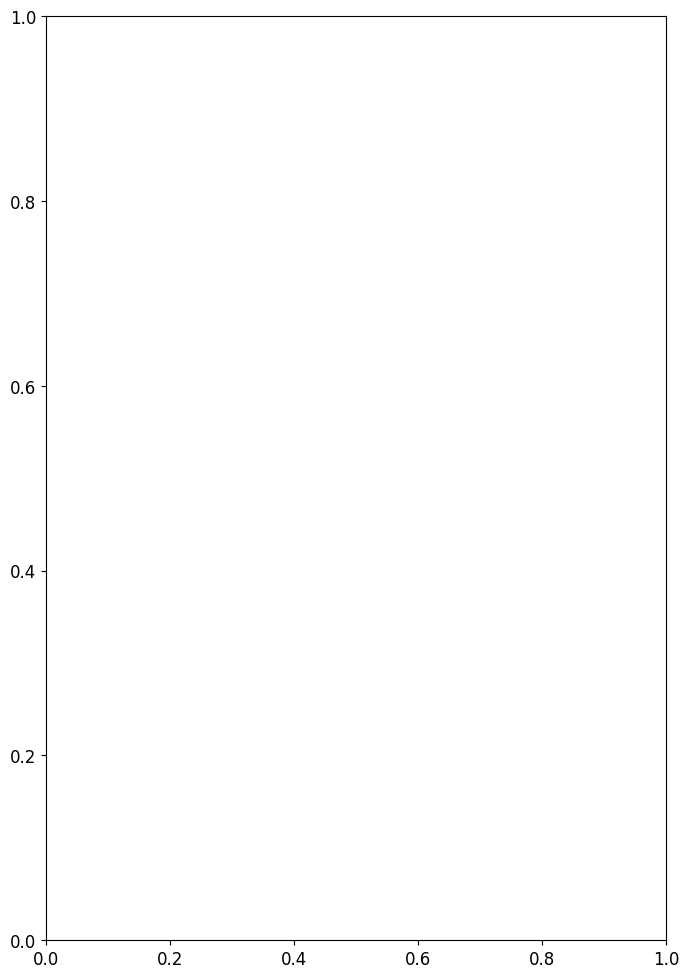

In [52]:
fig, ax = plt.subplots(
    figsize=(8, 12),
)

In [53]:
marker_cycle = iter(markers)

for i, dataset in enumerate(name2dataset.values()):
    marker = next(marker_cycle)
    bsim_table = create_table(dataset, "bsim").drop(columns="all").drop(labels="all")
    neighbsim_table = create_table(dataset, "neighbsim").drop(columns="all").drop(labels="all")

    dataset_offset = i * (inter_dataset_offset + 2 * intra_dataset_offset)

    for j, size_bin in enumerate(bins):
        offset = dataset_offset + j * intra_dataset_offset

        bsim_auc = bsim_table[size_bin]
        neighbsim_auc = neighbsim_table[size_bin]

        ymin = np.where(bsim_auc < neighbsim_auc, bsim_auc, neighbsim_auc)
        ymax = np.where(bsim_auc > neighbsim_auc, bsim_auc, neighbsim_auc)
        ax.vlines(x + offset, ymin=ymin, ymax=ymax, colors="grey", linestyles=bin2line[size_bin])

        rects = ax.scatter(
            x=x + offset,
            y=bsim_auc,
            # width=width,
            label=size_bin,
            color="mediumseagreen",
            alpha=1.0,
            marker=marker,
        )

        rects = ax.scatter(
            x=x + offset,
            y=neighbsim_auc,
            # width=width,
            label=size_bin,
            color="tomato",
            alpha=1.0,
            marker=marker,
        )

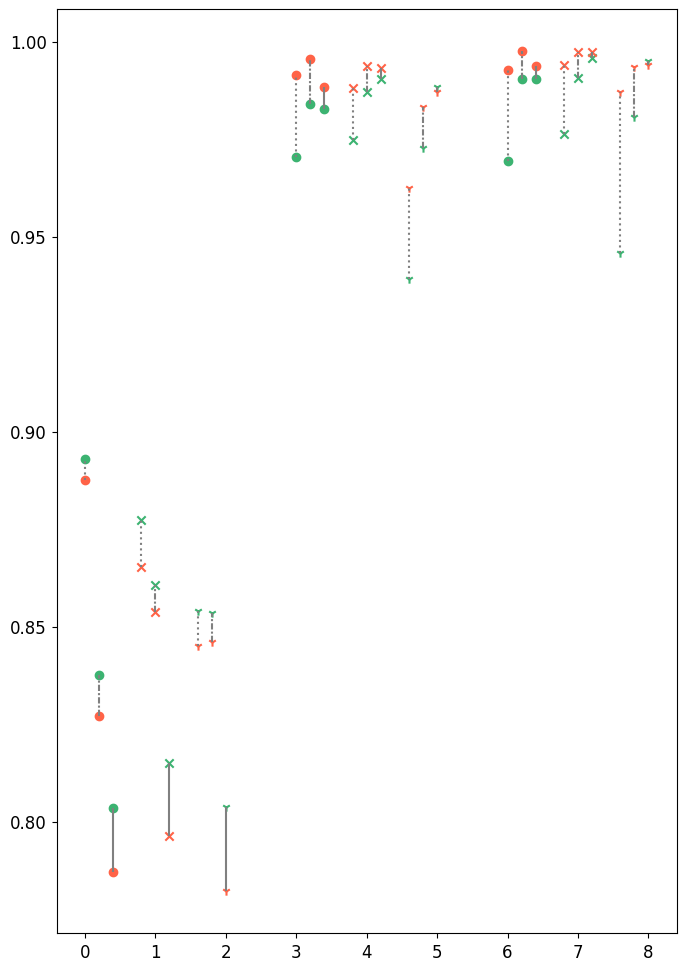

In [54]:
fig